In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import shapely as shy
import osmnx as ox

pd.options.display.max_rows = 4
%matplotlib inline

In [2]:
cd

C:\Users\jerem


In [4]:
fp = r"Box Sync\Policy Evaluation\input_data\VZV_Leading Pedestrian Interval Signals\geo_export_0c63b43f-83c0-4834-aa91-2c564c1bff2c.shp"
#fp =  r"..\input_data\leading_pedestrian_interval_signals_shapefile_2263\leading_pedestrian_interval_signals_shapefile_2263.shp"
df1 = gpd.read_file(fp)

In [5]:
df1.head(3)

,cross_stre,date_insta,time_insta,lat,long,main_stree,geometry
0,Dreiser loop East,2018-08-01,00:00:00.000,40.878465,-73.828273,Co-op City Blvd,POINT (-73.82827338235253 40.87846542795222)
1,West 119 St,2018-08-08,00:00:00.000,40.803958,-73.948271,Lenox Avenue,POINT (-73.94827133431397 40.80395846158952)
2,West 120 St,2018-08-08,00:00:00.000,40.804587,-73.947812,Lenox Avenue,POINT (-73.94781210658503 40.80458679730486)


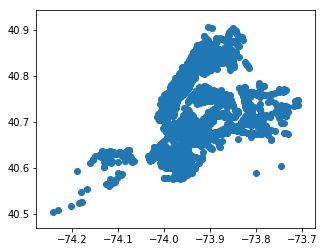

In [6]:
df1.plot()

In [7]:
df1.crs

{'init': 'epsg:4326'}

In [8]:
# Reproeject LPIS shapefile to EPSG 2263: NAD83 / New York Long Island (ftUS)
df1 = df1.to_crs({'init': 'epsg:2263'})

In [9]:
df1.crs

{'init': 'epsg:2263'}

In [10]:
type(df1)

geopandas.geodataframe.GeoDataFrame

In [24]:
# Create ID variable
df1['LPIS_ID'] = df1.index
df1.head(3)

,cross_stre,date_insta,time_insta,lat,long,main_stree,geometry,LPIS_ID
index_left,,,,,,,,
0,Dreiser loop East,2018-08-01,00:00:00.000,40.878465,-73.828273,Co-op City Blvd,"POLYGON ((1033739.000154228 259373.000004255, ...",0
1,West 119 St,2018-08-08,00:00:00.000,40.803958,-73.948271,Lenox Avenue,"POLYGON ((1000570.999889301 232184.9999184268,...",1
2,West 120 St,2018-08-08,00:00:00.000,40.804587,-73.947812,Lenox Avenue,"POLYGON ((1000697.999963389 232414.0001165908,...",2


In [11]:
df1.columns

Index(['cross_stre', 'date_insta', 'time_insta', 'lat', 'long', 'main_stree',
       'geometry'],
      dtype='object')

In [12]:
df1.geometry = df1['geometry'].buffer(2000)

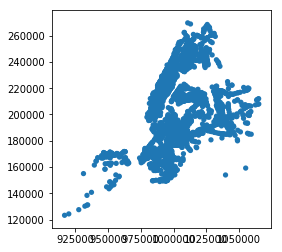

In [13]:
df1.plot()

In [14]:
df1.head(3)

,cross_stre,date_insta,time_insta,lat,long,main_stree,geometry
0,Dreiser loop East,2018-08-01,00:00:00.000,40.878465,-73.828273,Co-op City Blvd,"POLYGON ((1033739.000154228 259373.000004255, ..."
1,West 119 St,2018-08-08,00:00:00.000,40.803958,-73.948271,Lenox Avenue,"POLYGON ((1000570.999889301 232184.9999184268,..."
2,West 120 St,2018-08-08,00:00:00.000,40.804587,-73.947812,Lenox Avenue,"POLYGON ((1000697.999963389 232414.0001165908,..."


In [15]:
#fp =  r"D:\Projects\Policy Evaluation\input_data\notebook_output\LPIS_buffer.shp"
#df1.to_file(fp,driver ='ESRI Shapefile')

Tested the output in QGIS. It is exactly the same as the LPIS buffer I've created in QGIS.

Bringing in the signal traffic intersection dataframe

In [16]:
# outdated
#fp =  r"D:\Projects\Policy Evaluation\input_data\intersection_unique_shapefile_2263\intersection_unique_shapefile_2263.shp"
#df2 = gpd.read_file(fp)

# Open signal intersection shapefile
fp = r"Box Sync\Policy Evaluation\input_data\DOT_traffic_signals_Oct_2018\signal_controllers.shp"
df2 = gpd.read_file(fp)
df2.head(3)

,ST1_Name,ST2_Name,ST3_Name,ST4_Name,geometry
0,ALLEN STREET,CANAL STREET,None,None,POINT (986336.1490000039 199793.6093000025)
1,AVENUE OF THE AMERICAS,LAIGHT STREET,CANAL STREET,None,POINT (982769.3310000002 202206.1618999988)
2,AVENUE OF THE AMERICAS,LISPENARD STREET,WEST BROADWAY,None,POINT (982805.6183999926 201790.0942000002)


In [18]:
# Create ID variable
df2['intersection_ID'] = df2.index
df2.head(3)

,ST1_Name,ST2_Name,ST3_Name,ST4_Name,geometry,intersection_ID
0,ALLEN STREET,CANAL STREET,None,None,POINT (986336.1490000039 199793.6093000025),0
1,AVENUE OF THE AMERICAS,LAIGHT STREET,CANAL STREET,None,POINT (982769.3310000002 202206.1618999988),1
2,AVENUE OF THE AMERICAS,LISPENARD STREET,WEST BROADWAY,None,POINT (982805.6183999926 201790.0942000002),2


In [19]:
df2.columns

Index(['ST1_Name', 'ST2_Name', 'ST3_Name', 'ST4_Name', 'geometry',
       'intersection_ID'],
      dtype='object')

Perform spatial join:
Intention:
Capture all intersection_id that fall within each LPIS polygon. (Something like a 1:many merge, but spatially)

In [25]:
df2.crs = df1.crs
df1_with_df2 = gpd.sjoin(df1,df2[['intersection_ID', 'geometry']], how='inner', op='intersects')


In [26]:
df1_with_df2.head(3)

,cross_stre,date_insta,time_insta,lat,long,main_stree,geometry,LPIS_ID,index_right,intersection_ID
0,Dreiser loop East,2018-08-01,00:00:00.000,40.878465,-73.828273,Co-op City Blvd,"POLYGON ((1033739.000154228 259373.000004255, ...",0,3079,3079
0,Dreiser loop East,2018-08-01,00:00:00.000,40.878465,-73.828273,Co-op City Blvd,"POLYGON ((1033739.000154228 259373.000004255, ...",0,2973,2973
0,Dreiser loop East,2018-08-01,00:00:00.000,40.878465,-73.828273,Co-op City Blvd,"POLYGON ((1033739.000154228 259373.000004255, ...",0,3025,3025


In [27]:
filtered_data = df1_with_df2[df1_with_df2["intersection_ID"]==1]
print(filtered_data)

           cross_stre  date_insta    time_insta        lat       long  \
307   Franklin Street  2018-05-08  00:00:00.000  40.718274 -74.005325   
664     Broome Street  2018-01-22  00:00:00.000  40.721792 -73.999852   
...               ...         ...           ...        ...        ...   
2017    Broome Street  1998-06-10  00:00:00.000  40.724394 -74.006038   
2743     Beach Street  2016-11-28  00:00:00.000  40.720746 -74.010067   

            main_stree                                           geometry  \
307      Church Street  POLYGON ((984773.9999873067 200963.0000265919,...   
664           Broadway  POLYGON ((986290.9999060486 202245.0000872485,...   
...                ...                                                ...   
2017     Varick Street  POLYGON ((984576.4016292235 203192.9909734189,...   
2743  Greenwich Street  POLYGON ((983459.4015666411 201863.9910067472,...   

      LPIS_ID  index_right  intersection_ID  
307       307            1                1  
664   

saved out to check in QGIS and Stata.
Checks out. 
Now I have all intersections within each LPIS buffer.

In [28]:
df1_with_df2.columns

Index(['cross_stre', 'date_insta', 'time_insta', 'lat', 'long', 'main_stree',
       'geometry', 'LPIS_ID', 'index_right', 'intersection_ID'],
      dtype='object')

In [29]:
save_out = df1_with_df2[['LPIS_ID','intersection_ID']]

In [30]:
save_out.head(3)

,LPIS_ID,intersection_ID
0,0,3079
0,0,2973
0,0,3025


In [31]:
type(save_out)

pandas.core.frame.DataFrame

In [32]:
fp =  r"Box Sync\Policy Evaluation\working_data\intersection_2000ft_LPIS.dta"
save_out.to_stata(fp)